<a href="https://colab.research.google.com/github/parrisatwork/Data-Predictions/blob/main/Adult_Income_Parris_Trimingham.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Adult Income**

- **Author:** Parris Trimingham

## **Project Overview**

## Data Dictionary

## **Imports**

In [1]:
#Import libraries
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import set_config
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
sns.set_style('white')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import RFECV
from sklearn.metrics import roc_curve, roc_auc_score,accuracy_score,f1_score,log_loss,confusion_matrix,classification_report,precision_score,recall_score
## Filter ALL warnings
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder,StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer,make_column_transformer,make_column_selector
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


## **Function**

In [2]:
## functionize a barplot and call it plot_bar

def plot_bar(data,x, y, figsize=(20,5)):
    ## Make a larger fig/ax before plotting
    fig, ax = plt.subplots(figsize=figsize)

    ## Plot barplot

    ## counts, counts up the categories, sort the values, then puts them in a
    ## data frame.

    counts = df[x].value_counts().sort_values(ascending=False).to_frame()
    ## ploting the barplot

    sns.barplot(data=counts,x=counts.index, y = counts[x],ax=ax)

    plt.xticks(rotation= 90)
    ax.set_title(f'Categorical Frequencies of {y}', fontsize = 20, fontweight = 'bold');
    ax.set_xlabel(f'Categories for {y}', fontsize = 15, fontweight = 'bold')
    ax.set_ylabel('Counts', fontsize = 15, fontweight = 'bold')

    return fig,ax

## **Load and Inspect Data**


In [3]:
# Importing Data:
df = pd.read_csv('/content/drive/MyDrive/Data/adult income.csv')

In [4]:
# Gathering parameters:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [5]:
# Display index, columns, null count, and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


#### Preliminary: Before we break open the following project, it is good to get a hypothesis about what is to come. This is being made prior to research.

1. Source of data:
http://www.cs.toronto.edu/~delve/data/adult/desc.html

2. Brief description of data:
- "An individual’s annual income results from various factors. Intuitively, it is influenced by the individual’s education level, age, gender, occupation, and etc."

3. What is the target?
- to predict an individual’s annual income based off of various factors

4. What does one row represent? (A person?  A business?  An event? A product?)
- A person

5. Is this a classification or regression problem?
- Classification or possible regression, depending on the request

6. How many features does the data have?
- 10

7. How many rows are in the dataset?
- 48,842

8. What, if any, challenges do you foresee in cleaning, exploring, or modeling this dataset?
- In cleaning, there are almost 50,000 rows, meaning there will be a lot of information that we do not require; and this will have to be adjusted or removed.
- One advantage, however, is that we do not see any missing data. But, being the professionals we are, we will check later.

In [6]:
# Identify Columns
df.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

## **Clean Data**


### Delete Unnecessary Columns

In [7]:
# Remove Unnecessary Columns
df.drop(columns=['fnlwgt','educational-num','race','capital-gain','capital-loss'], inplace=True)
df.columns

Index(['age', 'workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'gender', 'hours-per-week', 'native-country', 'income'],
      dtype='object')

### Delete Duplicate Rows

In [8]:
# Display the number of duplicate rows in the dataset
print(f'There are {df.duplicated().sum()} duplicate rows.')

There are 8911 duplicate rows.


In [9]:
# Drop duplicte rows
df.drop_duplicates(inplace=True)

In [10]:
# Display the number of duplicate rows in the dataset
print(f'There are {df.duplicated().sum()} duplicate rows.')

There are 0 duplicate rows.


### Identify and Correct Inconsistencies in Categorical Values

In [11]:
df.columns

Index(['age', 'workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'gender', 'hours-per-week', 'native-country', 'income'],
      dtype='object')

In [12]:
# Check for and address any inconsistent values in categorical columns.
df.describe(include='object')

,workclass,education,marital-status,occupation,relationship,gender,native-country,income
count,39931,39931,39931,39931,39931,39931,39931,39931
unique,9,16,7,15,6,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,Male,United-States,<=50K
freq,26171,11917,17670,5356,15162,26044,34971,30504


#### Address "?"

In [13]:
# Find Waldo and '?'
df.isin(['?']).sum()

age                  0
workclass         2306
education            0
marital-status       0
occupation        2316
relationship         0
gender               0
hours-per-week       0
native-country     849
income               0
dtype: int64

In [14]:
# Clear up '?'
df['workclass']=df['workclass'].replace('?',np.nan)
df['occupation']=df['occupation'].replace('?',np.nan)
df['native-country']=df['native-country'].replace('?',np.nan)

In [15]:
# Confirm that '?' is gone.
df.isin(['?']).sum()

age               0
workclass         0
education         0
marital-status    0
occupation        0
relationship      0
gender            0
hours-per-week    0
native-country    0
income            0
dtype: int64

#### Categorial Cleanup

In [16]:
# Checking for discrepancies in categorical data column 'Workclass'
df['workclass'].value_counts()

Private             26171
Self-emp-not-inc     3669
Local-gov            2894
State-gov            1895
Self-emp-inc         1606
Federal-gov          1359
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [17]:
# Checking for discrepancies in categorical data column 'Education'
df['education'].value_counts()

HS-grad         11917
Some-college     8613
Bachelors        6427
Masters          2354
Assoc-voc        1900
Assoc-acdm       1545
11th             1536
10th             1235
7th-8th           913
Prof-school       771
9th               731
12th              607
Doctorate         565
5th-6th           495
1st-4th           241
Preschool          81
Name: education, dtype: int64

In [18]:
# Checking for discrepancies in categorical data column 'Marital Status'
df['marital-status'].value_counts()

Married-civ-spouse       17670
Never-married            12552
Divorced                  6057
Separated                 1499
Widowed                   1490
Married-spouse-absent      626
Married-AF-spouse           37
Name: marital-status, dtype: int64

In [19]:
# Checking for discrepancies in categorical data column 'Occupation'
df['occupation'].value_counts()

Prof-specialty       5356
Exec-managerial      5032
Adm-clerical         4514
Sales                4460
Craft-repair         4306
Other-service        4183
Machine-op-inspct    2291
Transport-moving     1949
Handlers-cleaners    1629
Farming-fishing      1413
Tech-support         1310
Protective-serv       918
Priv-house-serv       239
Armed-Forces           15
Name: occupation, dtype: int64

In [20]:
# Checking for discrepancies in categorical data column 'Relationship'
df['relationship'].value_counts()

Husband           15162
Not-in-family     10997
Own-child          5394
Unmarried          4746
Wife               2177
Other-relative     1455
Name: relationship, dtype: int64

In [21]:
# Checking for discrepancies in categorical data column 'Gender'
df['gender'].value_counts()

Male      26044
Female    13887
Name: gender, dtype: int64

In [22]:
# Checking for discrepancies in categorical data column 'Native Country'
df['native-country'].value_counts()

United-States                 34971
Mexico                          920
Philippines                     292
Germany                         205
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         105
Italy                           104
Dominican-Republic              102
Japan                            92
Poland                           87
Vietnam                          86
Guatemala                        86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           64
Iran                             59
Greece                           49
Nicaragua                        49
Peru                             46
Ecuador                     

In [23]:
# Checking for discrepancies in categorical data column 'Income'
df['income'].value_counts()

<=50K    30504
>50K      9427
Name: income, dtype: int64

### Identify and Addressed Missing Values

In [24]:
df.isnull().sum()

age                  0
workclass         2306
education            0
marital-status       0
occupation        2316
relationship         0
gender               0
hours-per-week       0
native-country     849
income               0
dtype: int64

In [25]:
# Display the total number of missing values
print(f'There are {df.isna().sum().sum()} missing values.')

There are 5471 missing values.


In [26]:
df.dropna(how='any', inplace=True)

In [27]:
# Display the total number of missing values
print(f'There are {df.isna().sum().sum()} missing values.')

There are 0 missing values.


### Univariate Visuals for the Target

In [28]:
label_encoder = preprocessing.LabelEncoder()

df['gender'] = label_encoder.fit_transform(df['gender'])
df['workclass'] = label_encoder.fit_transform(df['workclass'])
df['education'] = label_encoder.fit_transform(df['education'])
df['marital-status'] = label_encoder.fit_transform(df['marital-status'])
df['occupation'] = label_encoder.fit_transform(df['occupation'])
df['relationship'] = label_encoder.fit_transform(df['relationship'])
df['native-country'] = label_encoder.fit_transform(df['native-country'])
df['income'] = label_encoder.fit_transform(df['income'])

In [29]:
X_train, X_test, y_train, y_test = train_test_split(df[['age', 'gender', 'workclass', 'hours-per-week',
                                                          'education', 'native-country', 'income']],
                                                    df.age, test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((25767, 7), (11044, 7))

In [30]:
# Scaling
scaler = RobustScaler()

X_train_scaled_ro = scaler.fit_transform(X_train)
X_test_scaled_ro = scaler.transform(X_test)

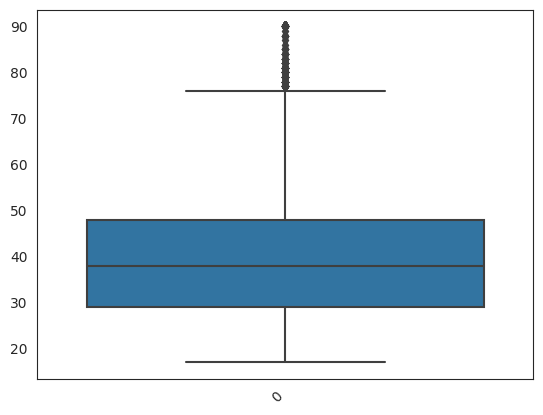

In [31]:
sns.boxplot(df['age'])
plt.xticks(rotation=45,ha='right');

- The Outliers seen with Age are everything above 80 years old to 100 years old.

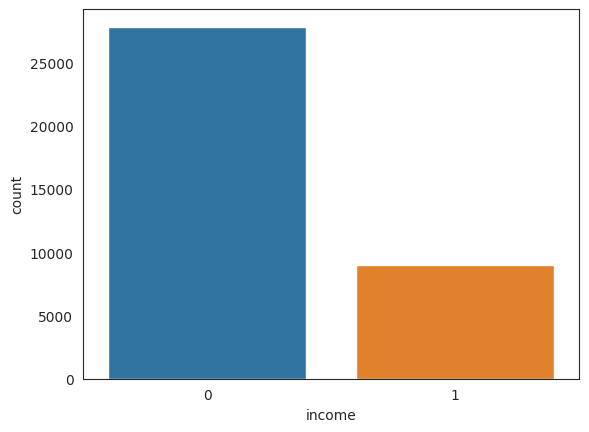

In [32]:
sns.countplot(df, x='income');

- The above chart shows just how many around the world, that were surveyed, make and income above and below the $50,000 line.

### Multivariate Visuals for the Target

#### We can identify any moderate or strong correlations between our target, the Income, and use that to further our data exploration.

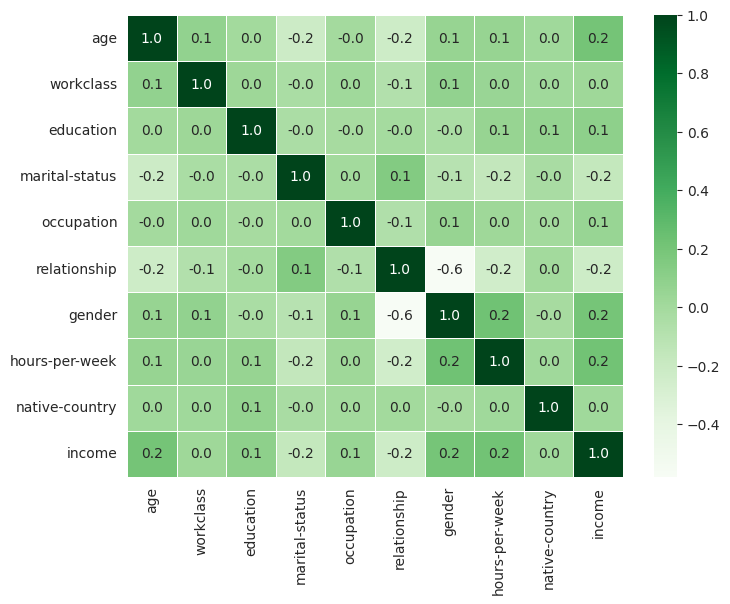

In [33]:
# Heatmap the correlations
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(df.corr(), annot = True, linewidths = .5, fmt = '.1f',ax = ax, cmap = 'Greens')
plt.show();

#### From above, we see that three close correlations to Income are Gender, Hours-per-week, and Age.

0    27846
1     8965
Name: income, dtype: int64


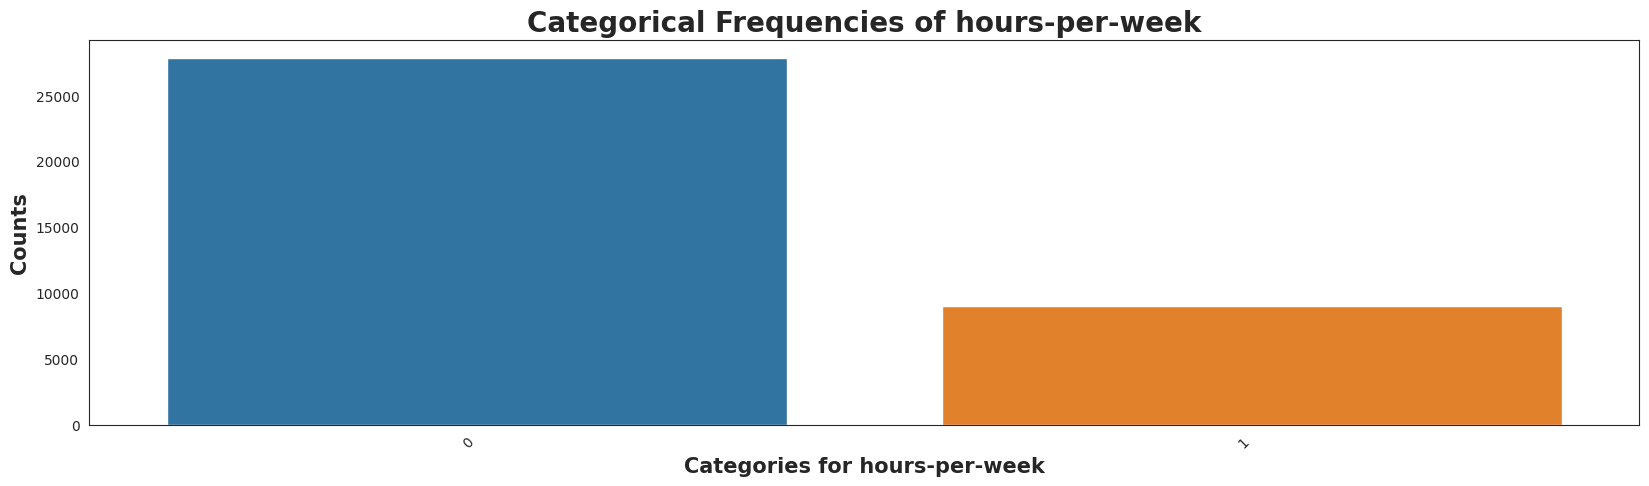

In [34]:
fig, ax = plot_bar(df, 'income', 'hours-per-week');
print(df['income'].value_counts())
plt.xticks(rotation=45,ha='right');

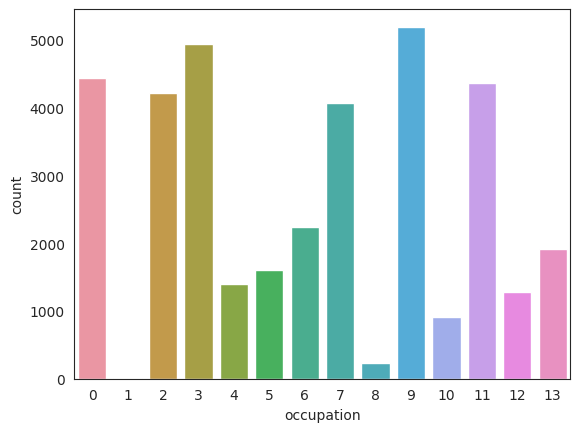

In [35]:
# Occupation Evaluation
sns.countplot(df, x='occupation');

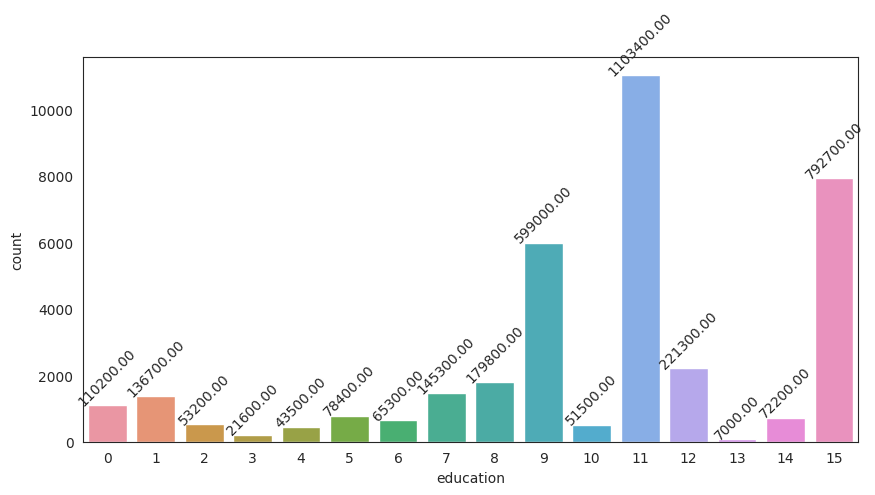

In [36]:
plt.figure(figsize=(10,5))

a = float(len(['income']))
a = sns.countplot(x='education',data = df)
for s in a.patches:
    height = s.get_height()
    a.text(s.get_x()+s.get_width()/2.,height+3,'{:1.2f}'.format((height)*100),rotation=45,ha='center')
plt.show()

## For the Stakeholder

- Using the above charts, it is my professional recommendation that we can utilize the data of age, education, years working, and debt; to make an educated guess in order to predict someones income level.

## Modeling

In [37]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV

## GridSearchCV With a Pipeline

In [38]:
param_grid = {'max_depth': [1,2,3],
              'min_samples_leaf': [3,15,20],
              'min_samples_split': [2, 10, 100]}

pd.DataFrame(param_grid).T

,0,1,2
max_depth,1,2,3
min_samples_leaf,3,15,20
min_samples_split,2,10,100


In [39]:
scores = {}

#loop through all combinations of values for all hyperparameters
for d in param_grid['max_depth']:
  for l in param_grid['min_samples_leaf']:
    for s in param_grid['min_samples_split']:
      #fit a model for each combination of hyperparameter values
      model = DecisionTreeClassifier(max_depth=d,
                                     min_samples_leaf=l,
                                     min_samples_split=s)
      model.fit(X_train, y_train)
      score = model.score(X_test, y_test)
      #add the model accuracy to a dictionary with the parameter settings as the
      #keys and the accuracies as the values.
      scores[f'depth {d}, min_samples_leaf {l}, min_samples_split {s} accuracy'] = score.round(6) * 100

#Display dictionary of scores
scores

{'depth 1, min_samples_leaf 3, min_samples_split 2 accuracy': 5.315099999999999,
 'depth 1, min_samples_leaf 3, min_samples_split 10 accuracy': 5.315099999999999,
 'depth 1, min_samples_leaf 3, min_samples_split 100 accuracy': 5.315099999999999,
 'depth 1, min_samples_leaf 15, min_samples_split 2 accuracy': 5.315099999999999,
 'depth 1, min_samples_leaf 15, min_samples_split 10 accuracy': 5.315099999999999,
 'depth 1, min_samples_leaf 15, min_samples_split 100 accuracy': 5.315099999999999,
 'depth 1, min_samples_leaf 20, min_samples_split 2 accuracy': 5.315099999999999,
 'depth 1, min_samples_leaf 20, min_samples_split 10 accuracy': 5.315099999999999,
 'depth 1, min_samples_leaf 20, min_samples_split 100 accuracy': 5.315099999999999,
 'depth 2, min_samples_leaf 3, min_samples_split 2 accuracy': 10.6936,
 'depth 2, min_samples_leaf 3, min_samples_split 10 accuracy': 10.6936,
 'depth 2, min_samples_leaf 3, min_samples_split 100 accuracy': 10.6936,
 'depth 2, min_samples_leaf 15, min_samp

In [40]:
model = DecisionTreeClassifier()

param_grid = {'max_depth': [1,2,3],
              'min_samples_leaf': [3,15,20],
              'min_samples_split': [2, 10, 100]}

In [41]:
# Use Gridsearch
dt_grid_search = GridSearchCV(model, param_grid)

In [42]:
dt_grid_search.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 2, 3],
                         'min_samples_leaf': [3, 15, 20],
                         'min_samples_split': [2, 10, 100]})

In [43]:
dt_grid_search.best_params_

{'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 2}

In [44]:
param_grid2 = {'max_depth': [3, 5, 10],
              'min_samples_leaf': [1, 2, 3],
              'min_samples_split': [2, 4, 7]}

dt_grid_search2 = GridSearchCV(model, param_grid2)
dt_grid_search2.fit(X_train, y_train)
dt_grid_search2.best_params_

{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [45]:
# What is the best version of the model
best_model = dt_grid_search2.best_estimator_

# Refit the model
best_model.fit(X_train, y_train)
# Score the model
best_model.score(X_test, y_test)

0.5169322709163346

# Processing

In [46]:
X = df.drop(columns = ["income"])
y = df["income"]

In [47]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [48]:
# Instantiate Standard Scaler
scaler = StandardScaler()
ohe = OneHotEncoder(sparse = False, handle_unknown='ignore')
# Prepare separate processing pipelines for numeric and categorical data
num_pipe = make_pipeline(scaler)
cat_pipe = make_pipeline(ohe)
# Create ColumnSelectors for the the numeric and categorical data
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')
# Combine the Pipelines and ColumnSelectors into tuples for the ColumnTransformer
cat_tuple = (cat_pipe, cat_selector)
num_tuple = (num_pipe, num_selector)
# Create the preprocessing ColumnTransformer
preprocessor = make_column_transformer(cat_tuple, num_tuple, remainder='drop')
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f65eaee8a00>),
                                ('pipeline-2',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f65eaee8b80>)])

In [49]:
# Instantiate & fit data using PCA
pca = PCA(n_components=.95)
pca_processor = make_pipeline(preprocessor, pca)

In [50]:
# creating a preprocessed feature data frame
preprocessed_df = preprocessor.fit(X)

# KNN

In [51]:
# creating a default KNN classification model
knn = KNeighborsClassifier(n_neighbors = 1)
knn_pipe = make_pipeline(preprocessed_df, knn)

knn_pipe.fit(X_train, y_train)
knn_pipe.predict(X_test)

knn_train_score = knn_pipe.score(X_train, y_train)
knn_test_score = knn_pipe.score(X_test, y_test)
print(f"Train score: {knn_train_score}")
print(f"Test score: {knn_test_score}")

Train score: 0.9710228919153868
Test score: 0.7382375312398131


In [52]:
# Printing a classification report of the knn model
knn_preds = knn_pipe.predict(X_test)
print(classification_report(knn_preds, y_test))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83      6976
           1       0.46      0.45      0.45      2227

    accuracy                           0.74      9203
   macro avg       0.64      0.64      0.64      9203
weighted avg       0.74      0.74      0.74      9203



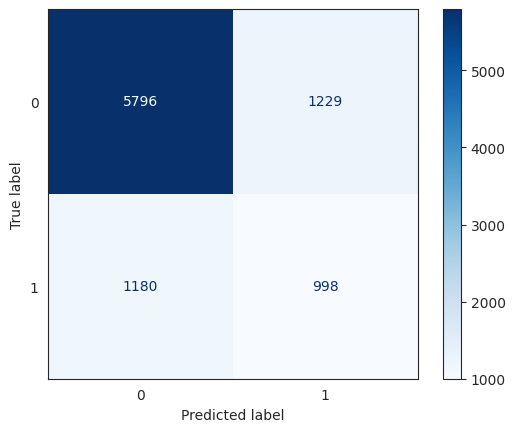

In [53]:
# Generating a confusion matrix of the knn model
cm = confusion_matrix(y_test.values, knn_preds)
cm_df = pd.DataFrame(cm)
ConfusionMatrixDisplay.from_predictions(y_test, knn_preds, cmap = "Blues");

In [54]:
# Predicted number of income results from the KNN model
unique, counts = np.unique(knn_preds, return_counts=True)
print(np.asarray((unique, counts)).T)

[[   0 6976]
 [   1 2227]]


In [55]:
# Hyperparameters
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 1,
 'p': 2,
 'weights': 'uniform'}

In [56]:
# KNN parameter grid
knn_param_grid = {"n_neighbors" : [1, 2, 3, 4, 5, 7, 11, 13, 15],
                  "leaf_size" : [20, 30, 40, 50, 60],
                  'weights' : ['uniform','distance'],
                  'metric' : ['minkowski','euclidean']}

In [57]:
# Best hyperparameters from the KNN parameter grid
base_estimator = KNeighborsClassifier()
X, y = make_classification(n_samples=1000)
sh = HalvingGridSearchCV(base_estimator, knn_param_grid, cv=5,
                         factor=2).fit(X, y)
sh.best_estimator_

KNeighborsClassifier(leaf_size=40, metric='euclidean', n_neighbors=11,
                     weights='distance')

In [58]:
# creating a tuned KNN classification model with PCA
knn_tuned = KNeighborsClassifier(n_neighbors = 7,
                                 leaf_size = 50,
                                 metric = "euclidean",
                                 weights = "distance")
knn_pipe_tuned = make_pipeline(pca_processor, knn_tuned)

knn_pipe_tuned.fit(X_train, y_train)
knn_pipe_tuned.predict(X_test)

knn_train_score_tuned = knn_pipe_tuned.score(X_train, y_train)
knn_test_score_tuned = knn_pipe_tuned.score(X_test, y_test)
print(f"Train score: {knn_train_score_tuned}")
print(f"Test score: {knn_test_score_tuned}")

Train score: 0.9710228919153868
Test score: 0.771161577746387


In [59]:
knn_preds_tuned = knn_pipe_tuned.predict(X_test)
print(classification_report(knn_preds_tuned, y_test))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      7205
           1       0.48      0.52      0.50      1998

    accuracy                           0.77      9203
   macro avg       0.67      0.68      0.67      9203
weighted avg       0.78      0.77      0.77      9203



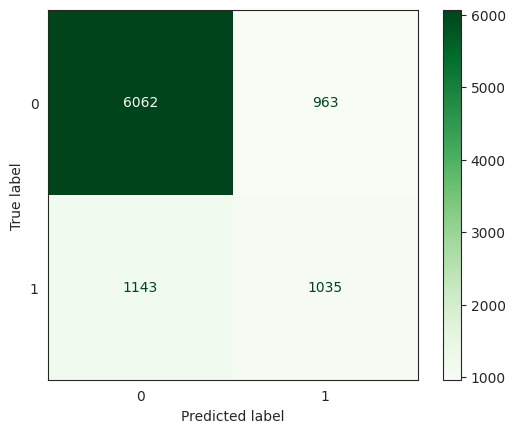

In [60]:
# generating a confusion matrix of the knn model
cm = confusion_matrix(y_test.values, knn_preds_tuned)
cm_df = pd.DataFrame(cm)
ConfusionMatrixDisplay.from_predictions(y_test, knn_preds_tuned, cmap = "Greens");

In [61]:
# Predicted number of income results from the tuned KNN model
unique, counts = np.unique(knn_preds_tuned, return_counts=True)
print(np.asarray((unique, counts)).T)

[[   0 7205]
 [   1 1998]]


## PCA

- "Principal component analysis, or PCA, is a statistical procedure that allows you to summarize the information content in large data tables by means of a smaller set of “summary indices” that can be more easily visualized and analyzed."

In [62]:
from sklearn.decomposition import PCA
pca = PCA()
X_train = pca.fit_transform(X_train)
pca.explained_variance_ratio_

array([4.33955325e-01, 3.71513589e-01, 1.06570981e-01, 3.82470892e-02,
       3.58931378e-02, 5.93962049e-03, 5.08143719e-03, 2.46881342e-03,
       3.30007375e-04])

In [63]:
from sklearn.decomposition import PCA

In [64]:
# Make pipeline with scaler and PCA covering 95 percent of variance
transformer = make_pipeline(StandardScaler(), PCA(n_components=.95))

In [65]:
df.columns

Index(['age', 'workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'gender', 'hours-per-week', 'native-country', 'income'],
      dtype='object')

In [66]:
X = df.drop(['income'], axis=1)
y = df['income']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


categorical = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'gender', 'native-country']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        X_train[feature] = le.fit_transform(X_train[feature])
        X_test[feature] = le.transform(X_test[feature])


X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)


pca= PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
dim = np.argmax(cumsum >= 0.90) + 1
print('The number of dimensions required to preserve 90% of variance is',dim)

The number of dimensions required to preserve 90% of variance is 8


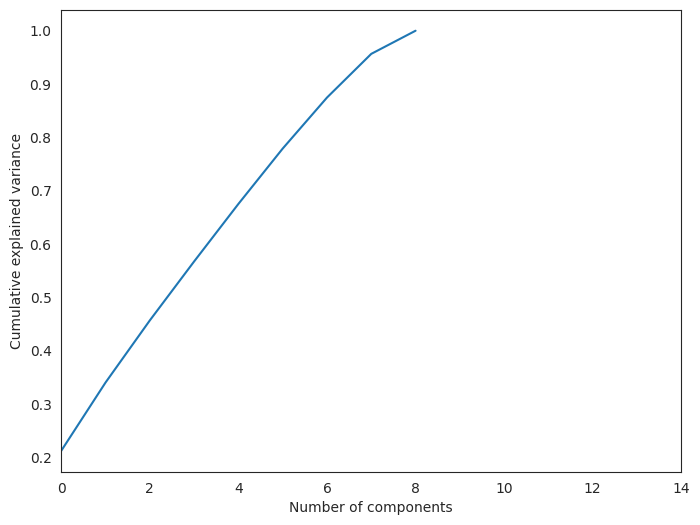

In [67]:
# Let's draw it out visually.
plt.figure(figsize=(8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,14,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

### The above plot shows that almost 90% of variance is explained by the first 2 components.

In [68]:
%%time
#instantiate knn model
pca_model = KNeighborsClassifier()
#make pipeline with transformer containing scaler and PCA with knn
pca_model_pipe = make_pipeline(transformer, pca_model)
#fit the model
pca_model_pipe.fit(X_train, y_train)
# get predictions for train
preds_pca_train = pca_model_pipe.predict(X_train)
# get prediction for test
preds_pca_test = pca_model_pipe.predict(X_test)
# get accuracy
train_accuracy = accuracy_score(y_train, preds_pca_train)
test_accuracy = accuracy_score(y_test, preds_pca_test)
print(f'PCA Model Train Accuracy: {train_accuracy}')
print(f'PCA Model Test Accuracy: {test_accuracy}')

PCA Model Train Accuracy: 0.8533007334963325
PCA Model Test Accuracy: 0.7332488228902572
CPU times: user 4.57 s, sys: 196 ms, total: 4.77 s
Wall time: 4.66 s


In [69]:
%%time
#make pipeline with scaler and knn model without PCA
#instantiate knn
no_pca_model = KNeighborsClassifier()
#make pipeline with scaler and knn
no_pca_model_pipe = make_pipeline(StandardScaler(), no_pca_model)
#fit model
no_pca_model_pipe.fit(X_train, y_train)
# get predictions for train
preds_no_pca_train = no_pca_model_pipe.predict(X_train)
# get prediction for test
preds_no_pca_test = no_pca_model_pipe.predict(X_test)
# get accuracy
train_accuracy = accuracy_score(y_train, preds_no_pca_train)
test_accuracy = accuracy_score(y_test, preds_no_pca_test)
print(f'Non PCA Train Accuracy: {train_accuracy}')
print(f'Non PCA Test Accuracy: {test_accuracy}')

Non PCA Train Accuracy: 0.854387394729693
Non PCA Test Accuracy: 0.7298985874683086
CPU times: user 4.17 s, sys: 67.1 ms, total: 4.24 s
Wall time: 4.24 s


## Compare the Production Models

In [70]:
# observing the value counts of the original target in order to compare them to the printed results
df["income"].value_counts()

0    27846
1     8965
Name: income, dtype: int64

In [71]:
# KNN again
knn_preds_tuned = knn_pipe_tuned.predict(X_test)
print(classification_report(knn_preds_tuned, y_test))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95      8437
           1       0.82      0.85      0.83      2607

    accuracy                           0.92     11044
   macro avg       0.89      0.90      0.89     11044
weighted avg       0.92      0.92      0.92     11044



- a) The KNN model that used PCA was very slightly less accurate on the test set.
- b) The KNN model that did not use the PCA was also twice as long as the other model.
- c) With the KNN  model, we see that the accuracy is at 92%. I am confident in this model to predict our future outcome.